# Assignment 1

## 1. load data and convert stock value to USD

In [71]:
import pandas as pd
import datetime
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import t
import quadprog

First, we carry out data cleaning and extraction. Note that we edit the given Excel spreadsheet by separating the cells containing exchange rates from the worksheet "hard_copy" to a new worksheet named "value_used" in order to handle currency conversion and analysis more easily.

In [72]:
# Load and preprocess the stock data
df_stock = pd.read_excel("PS1_data.xlsx", sheet_name="hard_copy", header=None)
df_stock.drop([0,1], inplace = True)
df_stock.columns = df_stock.iloc[0]
df_stock = df_stock[1:]
df_stock.columns.name = None
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock.set_index(df_stock['date'], inplace=True)
df_stock.drop(['date'], axis = 1, inplace=True)
df_stock = df_stock.astype(float, errors='ignore')
df_stock

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-03-30,13165.500000,5634.160156,6917.029785,4181.029785,17287.650391,6308.03,1420.86,45805.0
2007-04-02,13265.799805,5645.560059,6937.169922,4189.549805,17028.410156,6315.53,1424.55,45597.0
2007-04-03,13361.200195,5711.910156,7045.560059,4246.299805,17244.050781,6366.11,1437.77,46288.0
2007-04-04,13448.299805,5739.009766,7073.910156,4261.830078,17544.089844,6364.70,1439.37,46554.0
2007-04-05,13425.000000,5741.379883,7099.910156,4271.540039,17491.419922,6397.34,1443.76,46647.0
...,...,...,...,...,...,...,...,...
2021-12-21,20924.900391,6964.990234,15447.440430,4174.990234,28517.589844,7297.41,4649.23,105500.0
2021-12-22,21070.099609,7051.669922,15593.469727,4217.060059,28562.210938,7341.66,4696.56,105244.0
2021-12-23,21218.900391,7106.149902,15756.309570,4265.859863,28798.369141,7373.34,4725.79,104891.0


Now we load the data from the other sheet in order to convert all prices to usd.

In [73]:
# Load and preprocess the currency data
df_currencies = pd.read_excel('PS1_data.xlsx', sheet_name = 'value_usd', header=None)
df_currencies.drop([0, 1], inplace=True)
df_currencies.columns = df_currencies.iloc[0]
df_currencies = df_currencies[1:]
df_currencies.columns.name = None
df_currencies['date'] = pd.to_datetime(df_currencies['date'])
df_currencies.set_index(df_currencies['date'], inplace=True)
df_currencies.drop(['date'], axis=1, inplace=True)
df_currencies = df_currencies.astype(float, errors='ignore')
df_currencies

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-03-30,0.866326,1.335898,1.335898,1.335898,0.008488,1.952515,1.0,0.486618
2007-04-02,0.864902,1.337006,1.337006,1.337006,0.008492,1.978200,1.0,0.489357
2007-04-03,0.863148,1.332498,1.332498,1.332498,0.008413,1.973399,1.0,0.491666
2007-04-04,0.863036,1.337399,1.337399,1.337399,0.008420,1.976402,1.0,0.492926
2007-04-05,0.868885,1.343201,1.343201,1.343201,0.008425,1.971492,1.0,0.493243
...,...,...,...,...,...,...,...,...
2021-12-21,0.773036,1.127752,1.127752,1.127752,0.008798,1.321000,1.0,0.174177
2021-12-22,0.773814,1.128757,1.128757,1.128757,0.008772,1.326964,1.0,0.174095
2021-12-23,0.778137,1.132888,1.132888,1.132888,0.008763,1.335203,1.0,0.176897


The next dataframe contains the prices of the stocks in USD.

In [74]:
df_stock_usd = df_stock * df_currencies
df_stock_usd

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-03-30,11405.614953,7526.663284,9240.446256,5585.429328,146.737577,12316.523195,1420.86,22289.537490
2007-04-02,11473.616783,7548.147672,9275.037809,5601.453227,144.605259,12493.381446,1424.55,22313.211129
2007-04-03,11532.693226,7611.108859,9388.194687,5658.185998,145.074199,12562.875108,1437.77,22758.235808
2007-04-04,11606.366871,7675.345922,9460.640369,5699.767284,147.721236,12579.205809,1439.37,22947.677004
2007-04-05,11664.781125,7711.827200,9536.606421,5737.536852,147.365213,12612.304631,1443.76,23008.306221
...,...,...,...,...,...,...,...,...
2021-12-21,16175.701299,7854.781666,17420.881840,4708.353586,250.897755,9639.878610,4649.23,18375.673500
2021-12-22,16304.338059,7959.621786,17601.238109,4760.036061,250.547714,9742.118520,4696.56,18322.454180
2021-12-23,16511.211494,8050.471950,17850.134036,4832.741448,252.360109,9844.905688,4725.79,18554.903227


Now let's compute log returns for all stocks.

In [75]:
df_returns = np.log(df_stock_usd / df_stock_usd.shift(1))
df_returns.drop([df_returns.index[0]], axis=0, inplace=True)
df_returns

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-04-02,0.005944,0.002850,0.003737,0.002865,-0.014638,0.014257,0.002594,0.001062
2007-04-03,0.005136,0.008307,0.012126,0.010077,0.003238,0.005547,0.009237,0.019748
2007-04-04,0.006368,0.008404,0.007687,0.007322,0.018082,0.001299,0.001112,0.008290
2007-04-05,0.005020,0.004742,0.007998,0.006605,-0.002413,0.002628,0.003045,0.002639
2007-04-10,0.003777,0.004326,0.009359,0.006982,0.006290,0.003346,0.003202,0.011431
...,...,...,...,...,...,...,...,...
2021-12-21,0.015750,0.016735,0.016559,0.019405,0.019291,0.012242,0.017622,-0.003873
2021-12-22,0.007921,0.013259,0.010300,0.010917,-0.001396,0.010550,0.010129,-0.002900
2021-12-23,0.012608,0.011349,0.014042,0.015159,0.007208,0.010496,0.006204,0.012607


After that, here are the information about the stocks. The mean and standard deviation of the indexes can be seen in the chart below.

In [76]:
df_returns.describe()

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,0.000117,0.000025,0.000207,-0.000041,0.000165,-0.000065,0.000374,-0.000060
std,0.015251,0.018352,0.018058,0.018481,0.016163,0.015374,0.013581,0.024794
min,-0.134755,-0.135855,-0.135420,-0.137276,-0.180166,-0.122238,-0.127652,-0.196712
25%,-0.005599,-0.007670,-0.007423,-0.007660,-0.006992,-0.006934,-0.004264,-0.011410
50%,0.000963,0.000566,0.000685,0.000556,0.000484,0.000320,0.000812,0.000018
75%,0.006798,0.008451,0.008548,0.008583,0.007909,0.007409,0.006232,0.012528
max,0.111736,0.242904,0.233184,0.243568,0.176489,0.133055,0.104236,0.258927


How about skewness?

In [77]:
df_returns.skew()

TSX           -0.866287
CAC            0.372231
DAX            0.410990
Eurostoxx50    0.283744
NIKKEI225     -0.552431
FTSE100       -0.274447
SP500         -0.637743
IBOVESPA      -0.154794
dtype: float64

And kurtosis?

In [78]:
df_returns.kurtosis()

TSX            12.306159
CAC            17.583211
DAX            16.916223
Eurostoxx50    16.980611
NIKKEI225      16.738605
FTSE100        10.097418
SP500          12.021852
IBOVESPA       11.078068
dtype: float64

And autocorrelation. Here we take lag 1.

In [79]:
df_returns.apply(lambda s: s.autocorr(lag=1))

TSX            0.007233
CAC           -0.075810
DAX           -0.058452
Eurostoxx50   -0.077204
NIKKEI225     -0.199259
FTSE100       -0.019601
SP500         -0.154566
IBOVESPA       0.012955
dtype: float64

And finally here is the correlation matrix.

In [80]:
df_returns.corr()

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
TSX,1.000000,0.677227,0.659697,0.661918,0.222340,0.716389,0.771410,0.685627
CAC,0.677227,1.000000,0.950523,0.984838,0.260700,0.841713,0.612419,0.567331
DAX,0.659697,0.950523,1.000000,0.966589,0.246152,0.809851,0.615929,0.540996
Eurostoxx50,0.661918,0.984838,0.966589,1.000000,0.248228,0.830241,0.611192,0.553301
NIKKEI225,0.222340,0.260700,0.246152,0.248228,1.000000,0.343642,0.099309,0.238317
FTSE100,0.716389,0.841713,0.809851,0.830241,0.343642,1.000000,0.616687,0.617852
SP500,0.771410,0.612419,0.615929,0.611192,0.099309,0.616687,1.000000,0.610080
IBOVESPA,0.685627,0.567331,0.540996,0.553301,0.238317,0.617852,0.610080,1.000000


Here is how to do without built in functions

In [81]:
X = df_returns.to_numpy(dtype=float)
n = X.shape[0]
mu = X.mean(axis=0)
xc = X - mu
m2 = (xc**2).sum(axis=0) / n
m3 = (xc**3).sum(axis=0) / n
g1 = m3 / np.power(m2, 1.5)
skew_manual = pd.Series(g1, index=df_returns.columns)
skew_manual

TSX           -0.865886
CAC            0.372059
DAX            0.410799
Eurostoxx50    0.283613
NIKKEI225     -0.552175
FTSE100       -0.274320
SP500         -0.637448
IBOVESPA      -0.154722
dtype: float64

In [82]:
X = df_returns.to_numpy(dtype=float)
n = X.shape[0]
mu = X.mean(axis=0)
xc = X - mu
m2 = (xc**2).sum(axis=0) / n
m4 = (xc**4).sum(axis=0) / n
kurt_manual = m4 / (m2**2) - 3    # here we computed the excess kurtosis by subtracting 3 from the standard kurtosis  
kurt_manual = pd.Series(kurt_manual, index=df_returns.columns)
kurt_manual

TSX            12.285325
CAC            17.554237
DAX            16.888278
Eurostoxx50    16.952566
NIKKEI225      16.710934
FTSE100        10.079991
SP500          12.001456
IBOVESPA       11.059129
dtype: float64

In [83]:
X = df_returns.to_numpy(dtype=float)
Xc = X - X.mean(axis=0)
std = Xc.std(axis=0, ddof=1)
corr_manual = (Xc / std).T @ (Xc / std) / (Xc.shape[0] - 1)
corr_manual = pd.DataFrame(
    corr_manual, index=df_returns.columns, columns=df_returns.columns)
corr_manual

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
TSX,1.000000,0.677227,0.659697,0.661918,0.222340,0.716389,0.771410,0.685627
CAC,0.677227,1.000000,0.950523,0.984838,0.260700,0.841713,0.612419,0.567331
DAX,0.659697,0.950523,1.000000,0.966589,0.246152,0.809851,0.615929,0.540996
Eurostoxx50,0.661918,0.984838,0.966589,1.000000,0.248228,0.830241,0.611192,0.553301
NIKKEI225,0.222340,0.260700,0.246152,0.248228,1.000000,0.343642,0.099309,0.238317
FTSE100,0.716389,0.841713,0.809851,0.830241,0.343642,1.000000,0.616687,0.617852
SP500,0.771410,0.612419,0.615929,0.611192,0.099309,0.616687,1.000000,0.610080
IBOVESPA,0.685627,0.567331,0.540996,0.553301,0.238317,0.617852,0.610080,1.000000


In [84]:
random_norm = np.random.normal(0, 0.01, 3240)

random_t = np.random.standard_t(df=3, size=3240) * 0.01

df_returns_qq = df_returns.copy() # create a copy of our data specifically for qq plot later
df_returns_qq["Stock_Gaussian"] = random_norm
# df_returns["Stock_FatTails"] = random_t

In [85]:
def plot_qq_grid_norm_dist(df):

    # Creates a grid of Q-Q plots for every column in the dataframe.

    stocks = df.columns
    num_stocks = len(stocks)

    # Calculate grid dimensions (e.g., 2 columns wide)
    cols = 3
    rows = (num_stocks + 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy looping

    for i, stock in enumerate(stocks):
        ax = axes[i]

        # Drop NAs (critical for returns data)
        clean_data = df[stock].dropna()

        # stats.probplot calculates the quantiles and the regression line
        # dist="norm" compares it against a Normal distribution
        stats.probplot(clean_data, dist="norm", plot=ax)

        # Customizing the plot for clarity
        ax.set_title(f"Q-Q Plot: {stock}", fontsize=12, fontweight='bold')
        ax.get_lines()[0].set_markerfacecolor('#1f77b4')  # Blue dots
        ax.get_lines()[0].set_markersize(4.0)
        ax.get_lines()[1].set_color('#d62728')           # Red fit line
        ax.get_lines()[1].set_linewidth(2.0)

    # Hide unused subplots if number of stocks is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    fig.legend(['Data', 'Fit line'], loc='upper left')

    plt.tight_layout()
    plt.show()

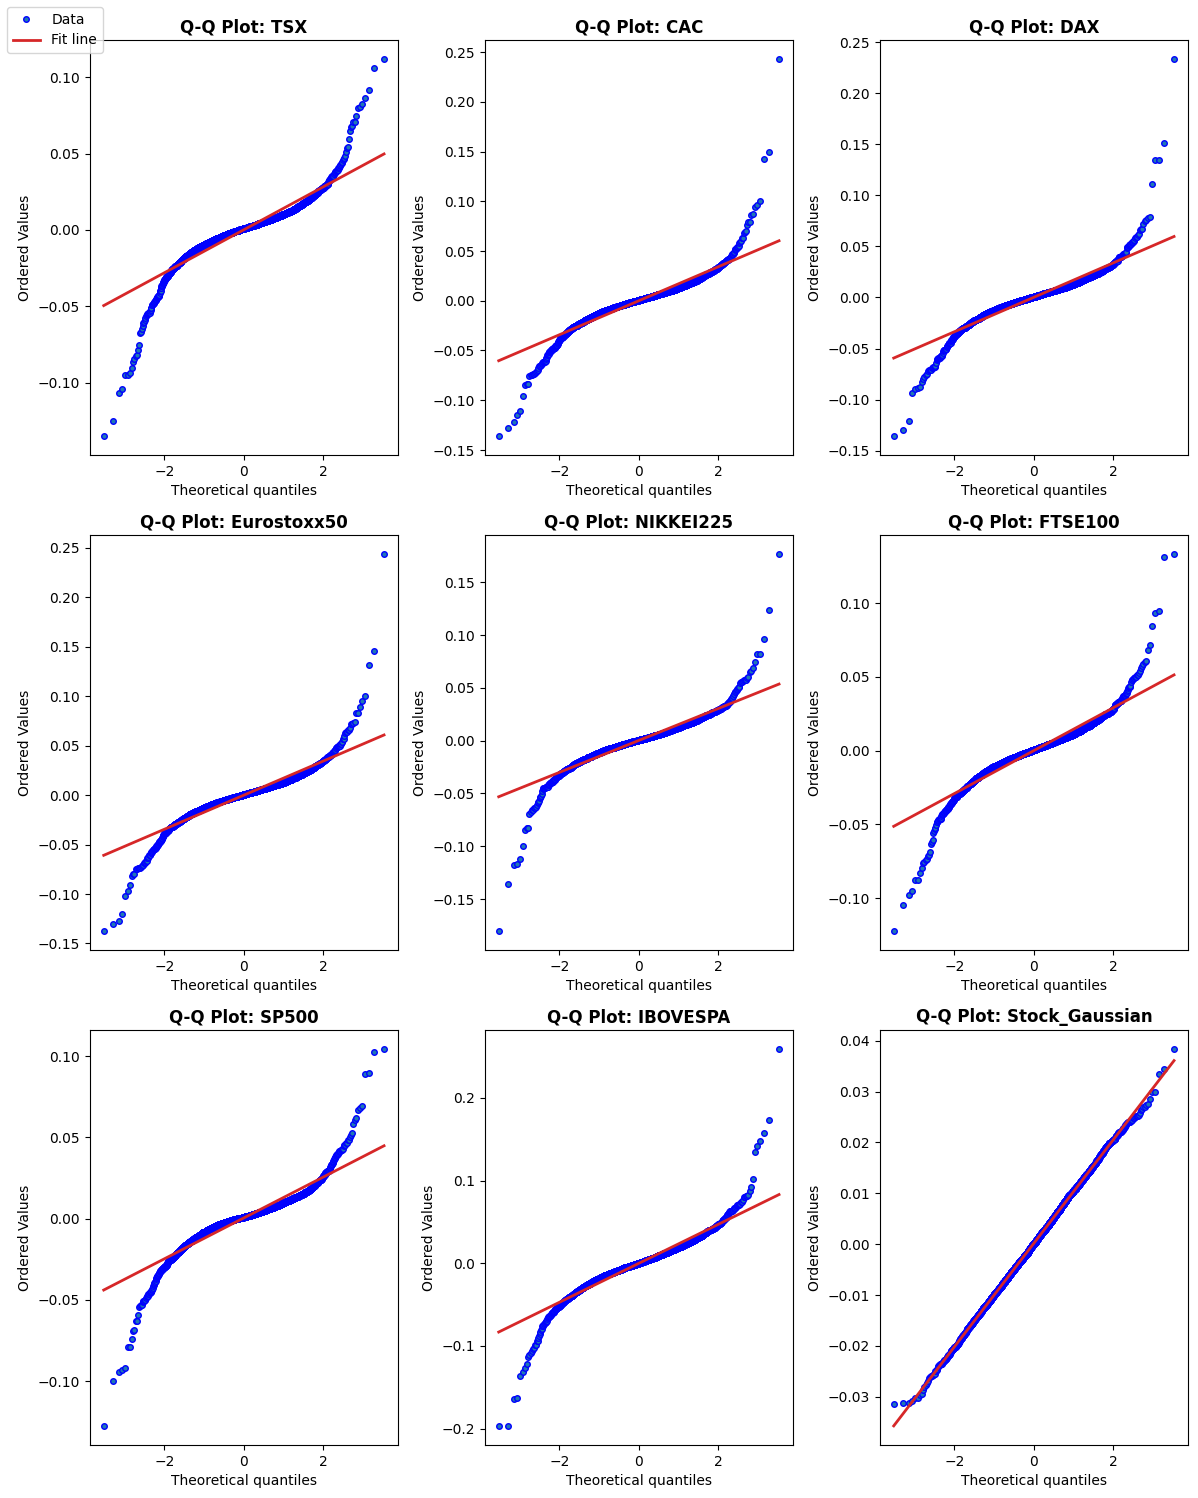

In [86]:
plot_qq_grid_norm_dist(df_returns_qq)

None of the stocks fits the red line, which means none of them is normally distributed. This S shape is reflecting the fat tails of the distribution which then indicate a potential approximation to a t-distribution.

## Question 2

Assuming 252 days per year (nb of trading days)

### 2.1 With Negative Weights

In [87]:
mu = df_returns.mean() * 252
Sigma = df_returns.cov() * 252

n_assets = len(mu)

# Define the Quadprog Solver Function

def solve_qp_markowitz(Sigma, mu, target_return, non_negative_weights=False):
    """
    Solves for weights w to Min (1/2)w'Sigma w
    st: sum(w)=1, w'mu=target_return, w>=0
    """

    # 1. Quadratic term (G): The Covariance Matrix
    # quadprog requires a symmetric matrix. ensure it is perfectly symmetric.
    G = Sigma.values

    # 2. Linear term (a): Zeros (since we minimize Variance)
    a = np.zeros(n_assets)

    # 3. Constraints (C, b)
    # Equation: C.T * x >= b

    # Constraint 1: Sum of weights = 1 (Equality)
    # Vector of ones: [1, 1, ... 1]
    C1 = np.ones((n_assets, 1))
    b1 = np.array([1.0])

    # Constraint 2: Portfolio Return = Target Return (Equality)
    # Vector of means: [mu1, mu2, ... mun]
    C2 = mu.values.reshape(-1, 1)
    b2 = np.array([target_return])

    if non_negative_weights:
        # Constraint 3: Long Only (w >= 0) (Inequality)
        # Identity matrix: I * w >= 0
        C3 = np.eye(n_assets)
        b3 = np.zeros(n_assets)

    # Stack the constraint matrices
    # Note: quadprog expects C to be (n_vars x n_constraints)
    
    if non_negative_weights:
        C = np.hstack((C1, C2, C3))
        b = np.hstack((b1, b2, b3))
    else:
        C = np.hstack((C1, C2))
        b = np.hstack((b1, b2))
        
    # meq = 2 because the first two constraints (Sum=1, Return=Target) are equalities
    result = quadprog.solve_qp(G, a, C, b, meq=2)

    return result[0]  # This returns the optimal weights w


In [88]:
# Define helper functions for efficient frontier computation

def solve_qp_gmv(Sigma, non_negative_weights=False):
    """
    Global Minimum Variance (GMV) portfolio:
    min (1/2) w' Sigma w
    s.t. sum(w) = 1
         w >= 0   (optional)
    """
    n_assets = Sigma.shape[0]

    G = Sigma.values
    a = np.zeros(n_assets)

    # Constraint 1: sum(w) = 1  -> in quadprog format C.T w >= b with meq=1
    C1 = np.ones((n_assets, 1))
    b1 = np.array([1.0])

    if non_negative_weights:
        # Constraint 2..: w >= 0
        C2 = np.eye(n_assets)
        b2 = np.zeros(n_assets)

        C = np.hstack((C1, C2))
        b = np.hstack((b1, b2))
    else:
        C = C1
        b = b1

    result = quadprog.solve_qp(G, a, C, b, meq=1)
    return result[0]


def find_mvp(mu, Sigma, non_negative_weights=False):

    mvp_weights = solve_qp_gmv(Sigma, non_negative_weights)

    mvp_return = float(np.dot(mvp_weights, mu))
    mvp_vol = float(np.sqrt(np.dot(mvp_weights.T, np.dot(Sigma, mvp_weights))))

    return mvp_weights, mvp_return, mvp_vol

    
    try:
        low_return = mu.min() - 0.1
        mvp_weights = solve_qp_markowitz(Sigma, mu, low_return, non_negative_weights)
        mvp_return = np.dot(mvp_weights, mu)
        mvp_vol = np.sqrt(np.dot(mvp_weights.T, np.dot(Sigma, mvp_weights)))
    except:
        try:
            mvp_weights = solve_qp_markowitz(Sigma, mu, mu.min(), non_negative_weights)
            mvp_return = np.dot(mvp_weights, mu)
            mvp_vol = np.sqrt(np.dot(mvp_weights.T, np.dot(Sigma, mvp_weights)))
        except:
            print("Could not find MVP")
    
    return mvp_weights, mvp_return, mvp_vol

def compute_frontier(mu, Sigma, mvp_return, non_negative_weights=False, n_points=50):

    # Compute the efficient frontier from MVP upwards.

    if mvp_return is not None:
        target_returns = np.linspace(mvp_return, mu.max(), n_points)
    else:
        target_returns = np.linspace(mu.min(), mu.max(), n_points)
    
    frontier_volatility = []
    frontier_returns = []
    weights = []
    
    for r in target_returns:
        try:
            w = solve_qp_markowitz(Sigma, mu, r, non_negative_weights)
            port_return = float(np.dot(w, mu))
            port_vol = float(np.sqrt(np.dot(w.T, np.dot(Sigma, w))))

            weights.append(w)
            frontier_returns.append(port_return)
            frontier_volatility.append(port_vol)

        except Exception as e:
            # record/print occasionally instead of silently passing
            # print(f"Frontier failed at target return {r:.4f}: {e}")
            continue

    
    return frontier_volatility, frontier_returns, weights

def find_tangency_portfolio(frontier_returns, frontier_volatility, weights, rf=0.0):

    sharpe_ratios = (np.array(frontier_returns) - rf) / np.array(frontier_volatility)
    max_sharpe_idx = np.argmax(sharpe_ratios)
    
    tangency_vol = frontier_volatility[max_sharpe_idx]
    tangency_ret = frontier_returns[max_sharpe_idx]
    tangency_weights = weights[max_sharpe_idx]
    
    return tangency_vol, tangency_ret, tangency_weights, sharpe_ratios, max_sharpe_idx

# Compute unconstrained efficient frontier
mvp_weights, mvp_return, mvp_vol = find_mvp(mu, Sigma, non_negative_weights=False)
frontier_volatility, frontier_returns, weights = compute_frontier(mu, Sigma, mvp_return, non_negative_weights=False)

Here we assume the risk-free rate is 0. Our later tangency portfolio will be found based on this assumption.

In [89]:
# Find Tangency Portfolio (Max Sharpe)
rf = 0.0
tangency_vol, tangency_ret, tangency_weights, sharpe_ratios, max_sharpe_idx = find_tangency_portfolio(
    frontier_returns, frontier_volatility, weights, rf)

In [90]:
# Define reporting function
def print_portfolio_results(tangency_weights, tangency_ret, tangency_vol, sharpe_ratio,
                          mvp_weights, mvp_ret, mvp_vol, asset_names, long_only=False):

    constraint_label = '(Long-Only, Max Sharpe Ratio)' if long_only else '(Max Sharpe Ratio)'
    print(f'Tangency Portfolio Weights {constraint_label}:')
    for i, asset in enumerate(asset_names):
        print(f'{asset}: {tangency_weights[i]:.4f}')
    print(f'\nTangency Portfolio Return: {tangency_ret:.6f}')
    print(f'Tangency Portfolio Volatility: {tangency_vol:.6f}')
    print(f'Tangency Portfolio Sharpe Ratio: {sharpe_ratio:.6f}')
    
    if mvp_weights is not None:
        print(f'\nMinimum Variance Portfolio:')
        print(f'MVP Return: {mvp_ret:.6f}')
        print(f'MVP Volatility: {mvp_vol:.6f}')
        for i, asset in enumerate(asset_names):
            print(f'{asset}: {mvp_weights[i]:.4f}')

/var/folders/b7/c222kzh54r1_8bthp0s2q9zw0000gn/T/ipykernel_96584/489606451.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (asset_vols[i], mu[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)


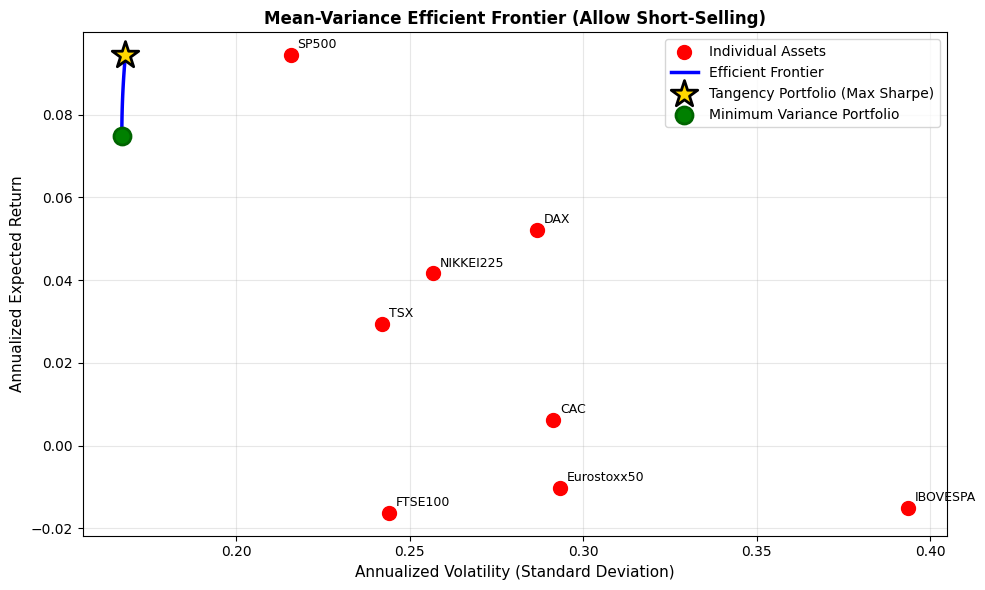

In [91]:
# define plotting function
def plot_efficient_frontier(frontier_vol, frontier_ret, tangency_vol, tangency_ret, 
                          mvp_vol, mvp_ret, asset_vols, mu, asset_names, 
                          title, frontier_color='b-'):

    plt.figure(figsize=(10, 6))
    
    # Plot Individual Assets
    plt.scatter(asset_vols, mu, color='red', label='Individual Assets', zorder=5, s=100)
    for i, txt in enumerate(asset_names):
        plt.annotate(txt, (asset_vols[i], mu[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    # Plot Efficient Frontier
    line_color = 'b-' if frontier_color == 'b-' else frontier_color
    plt.plot(frontier_vol, frontier_ret, line_color, linewidth=2.5, label='Efficient Frontier')
    
    # Plot Tangency Portfolio
    marker_color = 'gold' if frontier_color == 'b-' else 'orange'
    plt.scatter(tangency_vol, tangency_ret, color=marker_color, marker='*', s=400,
                edgecolors='black', linewidth=2, label='Tangency Portfolio (Max Sharpe)', zorder=6)
    
    # Plot MVP if found
    if mvp_vol is not None:
        mvp_color = 'green' if frontier_color == 'b-' else 'blue'
        mvp_edge = 'darkgreen' if frontier_color == 'b-' else 'darkblue'
        plt.scatter(mvp_vol, mvp_ret, color=mvp_color, marker='o', s=150,
                    edgecolors=mvp_edge, linewidth=2, label='Minimum Variance Portfolio', zorder=6)
    
    plt.title(title, fontsize=12, fontweight='bold')
    plt.xlabel('Annualized Volatility (Standard Deviation)', fontsize=11)
    plt.ylabel('Annualized Expected Return', fontsize=11)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot unconstrained frontier
# Sort frontier points by volatility for a clean curve
order = np.argsort(frontier_volatility)
frontier_volatility = list(np.array(frontier_volatility)[order])
frontier_returns = list(np.array(frontier_returns)[order])
weights = list(np.array(weights, dtype=object)[order])


asset_vols = np.sqrt(np.diag(Sigma))
plot_efficient_frontier(frontier_volatility, frontier_returns, tangency_vol, tangency_ret,
                       mvp_vol, mvp_return, asset_vols, mu, df_returns.columns,
                       'Mean-Variance Efficient Frontier (Allow Short-Selling)', 'b-')

In [92]:
# Print unconstrained results
print_portfolio_results(tangency_weights, tangency_ret, tangency_vol, sharpe_ratios[max_sharpe_idx],
                       mvp_weights, mvp_return, mvp_vol, df_returns.columns, long_only=False)

Tangency Portfolio Weights (Max Sharpe Ratio):
TSX: 0.0531
CAC: 0.0243
DAX: 0.2516
Eurostoxx50: -0.3434
NIKKEI225: 0.3779
FTSE100: 0.1450
SP500: 0.6402
IBOVESPA: -0.1486

Tangency Portfolio Return: 0.094338
Tangency Portfolio Volatility: 0.167975
Tangency Portfolio Sharpe Ratio: 0.561617

Minimum Variance Portfolio:
MVP Return: 0.074934
MVP Volatility: 0.166951
TSX: 0.0799
CAC: -0.1282
DAX: 0.0632
Eurostoxx50: -0.0271
NIKKEI225: 0.3745
FTSE100: 0.1939
SP500: 0.5857
IBOVESPA: -0.1418


### Analysis of Tangency Portfolio Weights (with Short-selling)


### 2.2 With Long-Only Constraint (Non-Negative Weights)

In [93]:
# Compute long-only efficient frontier
mvp_weights_lo, mvp_return_lo, mvp_vol_lo = find_mvp(mu, Sigma, non_negative_weights=True)
frontier_volatility_lo, frontier_returns_lo, weights_lo = compute_frontier(mu, Sigma, mvp_return_lo, non_negative_weights=True)

In [94]:
# Find Tangency Portfolio with Long-Only Constraint
tangency_vol_lo, tangency_ret_lo, tangency_weights_lo, sharpe_ratios_lo, max_sharpe_idx_lo = find_tangency_portfolio(
    frontier_returns_lo, frontier_volatility_lo, weights_lo, rf)

/var/folders/b7/c222kzh54r1_8bthp0s2q9zw0000gn/T/ipykernel_96584/489606451.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (asset_vols[i], mu[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)


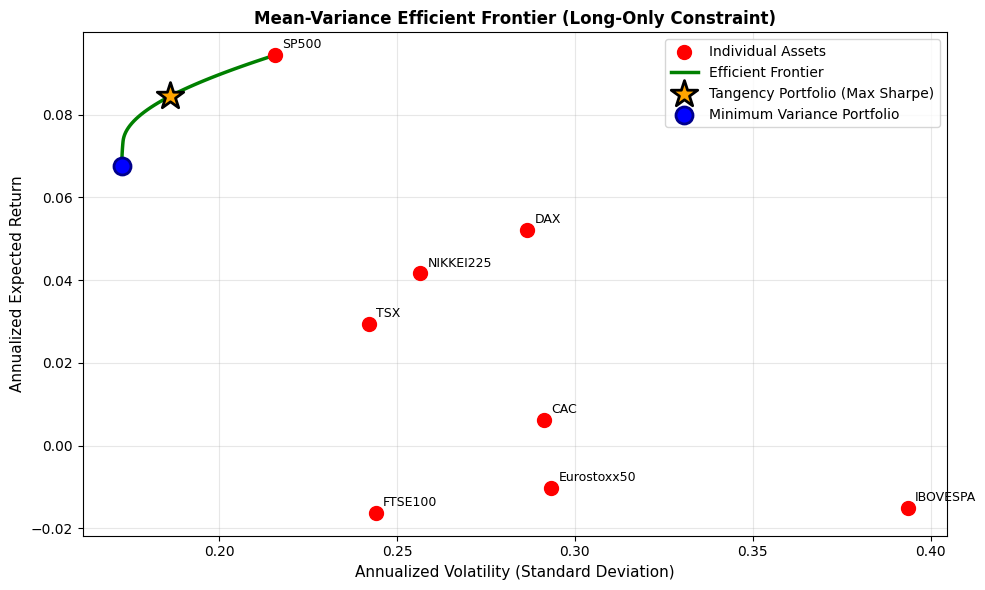

In [95]:
# Plot long-only efficient frontier
order = np.argsort(frontier_volatility_lo)
frontier_volatility_lo_sorted = np.array(frontier_volatility_lo)[order]
frontier_returns_lo_sorted = np.array(frontier_returns_lo)[order]

plot_efficient_frontier(frontier_volatility_lo_sorted, frontier_returns_lo_sorted, tangency_vol_lo, tangency_ret_lo,
                       mvp_vol_lo, mvp_return_lo, asset_vols, mu, df_returns.columns,
                       'Mean-Variance Efficient Frontier (Long-Only Constraint)', 'g-')

In [96]:
# Print long-only results
print_portfolio_results(tangency_weights_lo, tangency_ret_lo, tangency_vol_lo, sharpe_ratios_lo[max_sharpe_idx_lo],
                       mvp_weights_lo, mvp_return_lo, mvp_vol_lo, df_returns.columns, long_only=True)

Tangency Portfolio Weights (Long-Only, Max Sharpe Ratio):
TSX: -0.0000
CAC: 0.0000
DAX: -0.0000
Eurostoxx50: -0.0000
NIKKEI225: 0.1870
FTSE100: -0.0000
SP500: 0.8130
IBOVESPA: 0.0000

Tangency Portfolio Return: 0.084473
Tangency Portfolio Volatility: 0.186263
Tangency Portfolio Sharpe Ratio: 0.453513

Minimum Variance Portfolio:
MVP Return: 0.067483
MVP Volatility: 0.172604
TSX: 0.0000
CAC: -0.0000
DAX: -0.0000
Eurostoxx50: 0.0000
NIKKEI225: 0.3873
FTSE100: 0.0581
SP500: 0.5546
IBOVESPA: 0.0000


### Analysis of Tangency Portfolio Weights (without Short-selling)



### Comparison of Constrained versus Unconstrained Optimisation


## Question 3

In [97]:
# Data Loading and Preprocessing

data_path = "PS1_data.xlsx"  

raw = pd.read_excel(data_path, sheet_name="hard_copy", header=None)

asset_names = raw.iloc[2, 1:].tolist()

prices = raw.iloc[3:, :].copy()
prices.columns = ["date"] + asset_names

prices["date"] = pd.to_datetime(prices["date"], errors="coerce")
for c in asset_names:
    prices[c] = pd.to_numeric(prices[c], errors="coerce")

prices = prices.dropna(subset=["date"]).set_index("date").sort_index()
prices = prices.dropna(how="all")

In [98]:
# Log Returns Calculation

log_returns = df_returns
log_returns.head()

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
date,,,,,,,,
2007-04-02,0.005944,0.002850,0.003737,0.002865,-0.014638,0.014257,0.002594,0.001062
2007-04-03,0.005136,0.008307,0.012126,0.010077,0.003238,0.005547,0.009237,0.019748
2007-04-04,0.006368,0.008404,0.007687,0.007322,0.018082,0.001299,0.001112,0.008290
2007-04-05,0.005020,0.004742,0.007998,0.006605,-0.002413,0.002628,0.003045,0.002639
2007-04-10,0.003777,0.004326,0.009359,0.006982,0.006290,0.003346,0.003202,0.011431


In [99]:
# Rolling Window Setup
windows = []
for start_year in range(2010, 2018):  # 2010..2017 inclusive
    start = pd.Timestamp(f"{start_year}-01-01")
    end = pd.Timestamp(f"{start_year+4}-12-31")
    windows.append((start_year, start, end))
windows

[(2010, Timestamp('2010-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00')),
 (2011, Timestamp('2011-01-01 00:00:00'), Timestamp('2015-12-31 00:00:00')),
 (2012, Timestamp('2012-01-01 00:00:00'), Timestamp('2016-12-31 00:00:00')),
 (2013, Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00')),
 (2014, Timestamp('2014-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00')),
 (2015, Timestamp('2015-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00')),
 (2016, Timestamp('2016-01-01 00:00:00'), Timestamp('2020-12-31 00:00:00')),
 (2017, Timestamp('2017-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))]

In [100]:
# Portfolio Optimization Functions

TRADING_DAYS = 252

def annualize_mu_cov(daily_log_returns: pd.DataFrame):
    mu_d = daily_log_returns.mean().values  # daily mean vector
    cov_d = daily_log_returns.cov().values  # daily covariance matrix
    mu_a = mu_d * TRADING_DAYS
    cov_a = cov_d * TRADING_DAYS
    return mu_a, cov_a

def tangency_unconstrained(mu_a: np.ndarray, cov_a: np.ndarray, ridge: float = 1e-10):
    # rf=0, w ∝ Σ^{-1} μ, normalize to sum(w)=1
    n = len(mu_a)
    Sigma = cov_a + ridge * np.eye(n)
    invSigma = np.linalg.inv(Sigma)
    w_raw = invSigma @ mu_a
    w = w_raw / np.sum(w_raw)
    return w

def min_var_for_target_return_no_short(mu_a, cov_a, target_return, ridge: float = 1e-10):
    # Min w' Σ w
    n = len(mu_a)
    Sigma = cov_a + ridge * np.eye(n)

    G = Sigma
    a = np.zeros(n)

    # Constraints columns: [ones, mu, I]
    C = np.column_stack([np.ones(n), mu_a, np.eye(n)])
    b = np.concatenate(([1.0, float(target_return)], np.zeros(n)))

    sol = quadprog.solve_qp(G, a, C, b, meq=2)
    w = sol[0]
    return w

def tangency_no_short_via_grid(mu_a, cov_a, n_grid: int = 40):
    # Find the tangency portfolio under no-short-selling via grid search
    r_min = float(np.min(mu_a))
    r_max = float(np.max(mu_a))
    targets = np.linspace(r_min, r_max, n_grid)

    best = {"sharpe": -np.inf, "w": None, "ret": None, "vol": None}

    for tr in targets:
        try:
            w = min_var_for_target_return_no_short(mu_a, cov_a, tr)
            port_ret = float(w @ mu_a)
            port_vol = float(np.sqrt(w @ cov_a @ w))
            sharpe = port_ret / port_vol if port_vol > 0 else -np.inf

            if np.isfinite(sharpe) and sharpe > best["sharpe"]:
                best = {"sharpe": sharpe, "w": w, "ret": port_ret, "vol": port_vol}
        except Exception:
            # If optimization fails for this target return, skip it
            continue

    return best

In [101]:
# Rolling Window Portfolio Optimization
assets = log_returns.columns.tolist()

rows = []
w_uncon_list = []
w_noshort_list = []

for start_year, start, end in windows:
    sample = log_returns.loc[start:end].dropna(how="any")

    # Skip if insufficient data
    if len(sample) < 200:  # ~ < 1 trading year
        continue

    mu_a, cov_a = annualize_mu_cov(sample)

    w_uncon = tangency_unconstrained(mu_a, cov_a)
    best_ns = tangency_no_short_via_grid(mu_a, cov_a, n_grid=50)

    w_ns = best_ns["w"]
    if w_ns is None:
        # If no solution found, fill with NaNs
        w_ns = np.full(len(assets), np.nan)

    rows.append(f"{start_year}-{start_year+4}")
    w_uncon_list.append(w_uncon)
    w_noshort_list.append(w_ns)

w_uncon_df = pd.DataFrame(w_uncon_list, index=rows, columns=assets)
w_noshort_df = pd.DataFrame(w_noshort_list, index=rows, columns=assets)

w_uncon_df.head(), w_noshort_df.head()

(                TSX       CAC       DAX  Eurostoxx50  NIKKEI225   FTSE100  \
 2010-2014 -0.448280 -1.038489  2.195679    -1.345679   0.209796  0.257811   
 2011-2015 -2.601398  0.223859  3.181292    -3.174015   0.770538  0.218317   
 2012-2016 -0.739923  2.336765  2.648790    -4.569317   0.305286 -0.523665   
 2013-2017 -0.556350  2.431486  1.987344    -4.182337   0.252587 -0.319097   
 2014-2018 -2.489175  9.735095  4.943902   -14.201375   0.648447 -1.117572   
 
               SP500  IBOVESPA  
 2010-2014  1.707210 -0.538049  
 2011-2015  3.707031 -1.325623  
 2012-2016  1.768212 -0.226149  
 2013-2017  1.488065 -0.101698  
 2014-2018  3.180254  0.300424  ,
                     TSX           CAC           DAX   Eurostoxx50  NIKKEI225  \
 2010-2014  9.209974e-17 -1.116176e-16  5.752662e-18 -1.982183e-16   0.074264   
 2011-2015  8.454965e-18 -1.370416e-18  1.471648e-17  3.545497e-17   0.139164   
 2012-2016  7.426616e-17 -2.028476e-16  4.228234e-18 -6.321632e-16   0.137366   
 2013-2

In [102]:
# Market Capitalization Weights Loading
mc_raw = pd.read_excel(data_path, sheet_name="market_cap", header=None)

# Extract Tickers and Weights
mc_tickers = mc_raw.iloc[1, 1:].tolist()
mc_weights = pd.to_numeric(mc_raw.iloc[2, 1:], errors="coerce").values

# Create Market Cap Weights Series
mc_series = pd.Series(mc_weights, index=asset_names, name="mkt_cap_weight")

# Reindex to match assets order
mc_series = mc_series.reindex(assets)

mc_series

TSX            0.041834
CAC            0.043180
DAX            0.036197
Eurostoxx50    0.090955
NIKKEI225      0.092523
FTSE100        0.081589
SP500          0.602344
IBOVESPA       0.011378
Name: mkt_cap_weight, dtype: float64

In [103]:
# Distance Calculation Function

def weight_distances(w_df: pd.DataFrame, w_ref: pd.Series):
    aligned_ref = w_ref.reindex(w_df.columns).values
    W = w_df.values
    l1 = np.nansum(np.abs(W - aligned_ref), axis=1)
    l2 = np.sqrt(np.nansum((W - aligned_ref) ** 2, axis=1))
    out = pd.DataFrame({"L1_distance": l1, "L2_distance": l2}, index=w_df.index)
    return out

dist_uncon = weight_distances(w_uncon_df, mc_series)
dist_noshort = weight_distances(w_noshort_df, mc_series)

dist_uncon, dist_noshort

(           L1_distance  L2_distance
 2010-2014     7.115686     3.115269
 2011-2015    14.490405     6.282994
 2012-2016    12.569619     6.020193
 2013-2017    10.770477     5.395673
 2014-2018    36.045000    18.362235
 2015-2019    22.723741    12.206535
 2016-2020    24.979334    13.246142
 2017-2021    18.244063     9.283875,
            L1_distance  L2_distance
 2010-2014     0.646783     0.353411
 2011-2015     0.610266     0.298291
 2012-2016     0.610266     0.299576
 2013-2017     0.610266     0.294539
 2014-2018     0.636988     0.348713
 2015-2019     0.587760     0.265145
 2016-2020     0.737607     0.400067
 2017-2021     0.610266     0.283542)

In [104]:
# Display Final Weights and Market-Cap Weights
display(w_uncon_df.round(4))
display(w_noshort_df.round(4))
display(pd.DataFrame({"market_cap": mc_series}).T.round(4))

,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
2010-2014,-0.4483,-1.0385,2.1957,-1.3457,0.2098,0.2578,1.7072,-0.5380
2011-2015,-2.6014,0.2239,3.1813,-3.1740,0.7705,0.2183,3.7070,-1.3256
2012-2016,-0.7399,2.3368,2.6488,-4.5693,0.3053,-0.5237,1.7682,-0.2261
2013-2017,-0.5564,2.4315,1.9873,-4.1823,0.2526,-0.3191,1.4881,-0.1017
2014-2018,-2.4892,9.7351,4.9439,-14.2014,0.6484,-1.1176,3.1803,0.3004
2015-2019,-1.1011,6.9105,2.9832,-9.4142,0.5459,-0.6322,1.4553,0.2526
2016-2020,-0.4401,6.1603,4.9205,-10.4394,0.8329,-1.3958,1.1394,0.2221
2017-2021,-0.5495,5.4535,2.2108,-6.9224,0.6329,-1.0060,1.5991,-0.4183


,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
2010-2014,0.0000,-0.0,0.0,-0.0,0.0743,-0.0,0.9257,-0.0000
2011-2015,0.0000,-0.0,0.0,0.0,0.1392,0.0,0.8608,0.0000
2012-2016,0.0000,-0.0,0.0,-0.0,0.1374,-0.0,0.8626,0.0000
2013-2017,-0.0000,-0.0,-0.0,-0.0,0.1446,0.0,0.8554,0.0000
2014-2018,-0.0000,-0.0,0.0,-0.0,0.0792,-0.0,0.9208,0.0000
2015-2019,0.0081,-0.0,0.0,0.0,0.3019,-0.0,0.6868,0.0032
2016-2020,-0.0000,0.0,-0.0,0.0,0.4613,-0.0,0.5387,0.0000
2017-2021,-0.0000,-0.0,-0.0,0.0,0.3283,0.0,0.6717,-0.0000


,TSX,CAC,DAX,Eurostoxx50,NIKKEI225,FTSE100,SP500,IBOVESPA
market_cap,0.0418,0.0432,0.0362,0.091,0.0925,0.0816,0.6023,0.0114


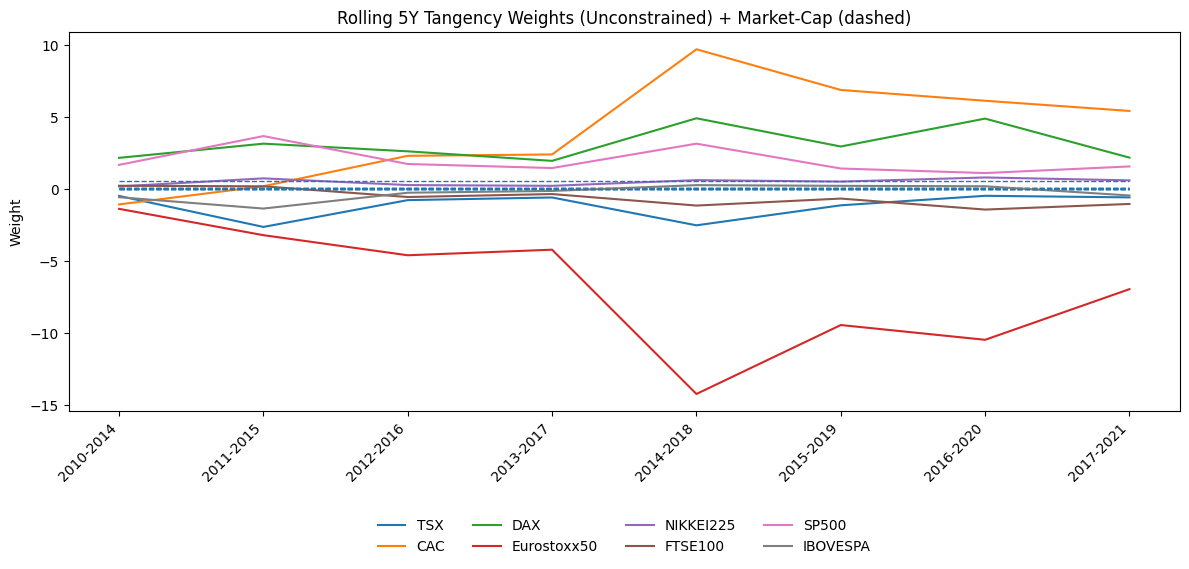

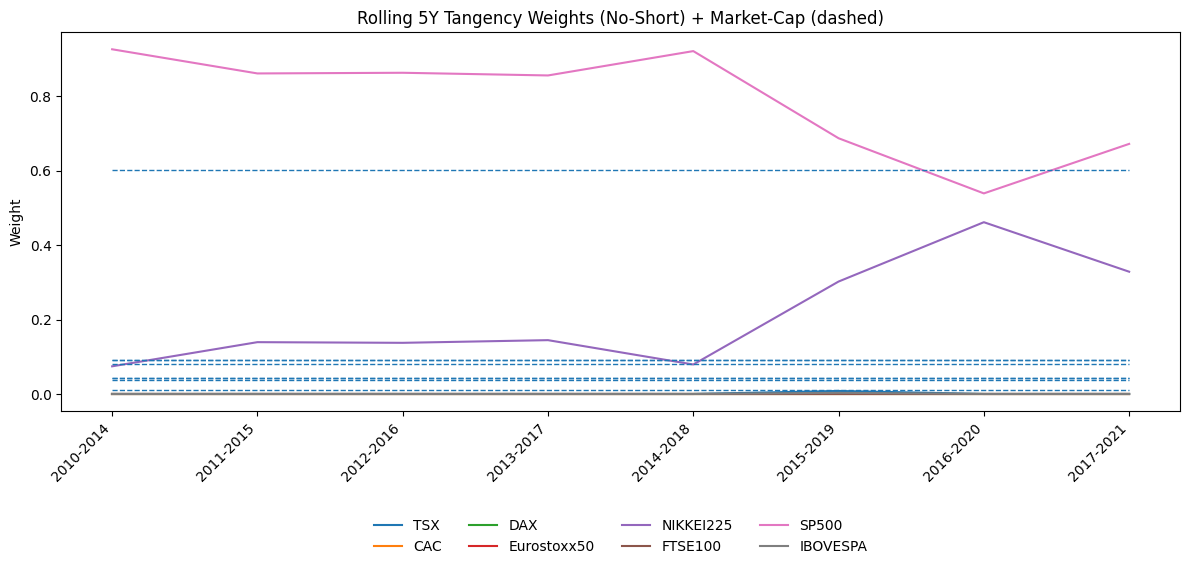

In [105]:
# Plotting Rolling Weights with Market-Cap Weights

x = np.arange(len(w_uncon_df.index))
labels = w_uncon_df.index.tolist()

# Plot 1: Unconstrained
plt.figure(figsize=(12, 6))
for a in assets:
    plt.plot(x, w_uncon_df[a].values, label=a)
    plt.hlines(mc_series[a], x.min(), x.max(), linestyles="dashed", linewidth=1)

plt.xticks(x, labels, rotation=45, ha="right")
plt.title("Rolling 5Y Tangency Weights (Unconstrained) + Market-Cap (dashed)")
plt.ylabel("Weight")

plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()

# Plot 2: No-short
plt.figure(figsize=(12, 6))
for a in assets:
    plt.plot(x, w_noshort_df[a].values, label=a)
    plt.hlines(mc_series[a], x.min(), x.max(), linestyles="dashed", linewidth=1)

plt.xticks(x, labels, rotation=45, ha="right")
plt.title("Rolling 5Y Tangency Weights (No-Short) + Market-Cap (dashed)")
plt.ylabel("Weight")

plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.25),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show()

The rolling 5-year mean–variance analysis highlights the strong instability of optimal portfolio weights over time. In the unconstrained case, the tangency portfolio exhibits extremely large positive and negative positions, reflecting the well-known sensitivity of mean–variance optimization to estimation error in expected returns and covariances. These extreme weights vary substantially across rolling windows, indicating poor temporal stability and limited practical implementability.

Imposing the no short-sale constraint (weights ≥ 0) leads to markedly more stable and interpretable portfolios. The constrained tangency portfolios are typically concentrated in a small number of assets, with weights shifting gradually across windows rather than changing sign abruptly. This reflects the binding nature of the non-negativity constraint, which mitigates estimation error at the cost of reduced diversification.

Comparing the mean–variance weights to market-cap weights reveals substantial differences. While market-cap allocations remain constant over time, mean–variance portfolios,especially in the unconstrained case-deviate strongly from them. Even under no-short constraints, the optimized portfolios often overweight assets with strong recent performance relative to their market capitalization, underscoring the contrast between return-driven optimization and capitalization-based allocation.